# Business Understanding

## Project Domain

Domain : Finance & Timeseries Forecasting <br>
Sub domain : Currency Exchange Rate Prediction <br>

Sistem prediksi nilai tukar IDR terhadap USD termasuk dalam bidang forecasting keuangan yang memanfaatkan data science dan machine learning untuk membantu pelaku usaha, investor, dan masyarakat dalam mengambil keputusan berbasis data terhadap pergerakan kurs.



## Problem Statements

1. Volatilitas kurs yang tinggi
Sekarang ini, nilai tukar Rupiah terhadap Dolar AS mengalamai pelemahan dan fluktuasi yang tajam akibat beberapa faktor seperti kebijakan moneter AS dan gejolak geopolitik, serta faktor domestik seperti inflasi dan defisit transaksi berjalan. Yang mana ketidakstabilan ini berdampak langsung pada daya beli, harga barang impor, dan ketidakpastian ekonomi.
2.  Kesulitan dalam perencanaan keuangan
akibat dari fluaktuasi ini penyebabkan pergerakan kurs yang sulit diprediksi menyulitkan pelaku usaha, ekspor, dan masyarakat dalam merencanakan anggaran atau investasi. Perubahan mendadak kurs dapat menyebabkan kerugian atau ketidakefisienan pengeluaran.
3. Kebutuhan terhadap Model Prediksi Nilai Tukar Berbasis Data
Diperlukan sebuah model prediksi nilai tukar berbasis data historis untuk membantu mitigasi risiko perubahan kurs. Model ini diharapkan mampu memprediksi pergerakan kurs dalam jangka pendek, yakni hingga akhir tahun 2025, dengan menggunakan data historis selama satu tahun terakhir.



## Goals

Membangun sistem prediksi berbasis machine learning untuk memperkirakan pergerakan kurs USD/IDR dalam jangka waktu 6 bulan ke depan dengan tujuan:

- Memberikan insight tentang potensi arah pergerakan kurs.
- Membantu pengambilan keputusan keuangan yang lebih akurat.
- Menyediakan model prediksi dengan akurasi minimal 80%.



## Solution Statements

- Membangun model prediksi menggunakan algoritma Recurrent Neural Network (RNN), yang dirancang untuk menangani data deret waktu (time series) seperti nilai tukar USD/IDR, dengan memanfaatkan data historis selama satu tahun terakhir.
- Mengembangkan dashboard berbasis Streamlit untuk menampilkan hasil prediksi nilai tukar dalam bentuk grafik interaktif, sehingga memudahkan pengguna dalam memahami tren pergerakan kurs.
- Melakukan hyperparameter tuning pada model RNN untuk meningkatkan akurasi prediksi, dengan target akurasi minimal 80% agar hasil model layak digunakan dalam pengambilan keputusan keuangan.



# Data Understanding

## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, InputLayer
import joblib

## Import data

In [ ]:
df = yf.download(tickers='IDR=X', period='1y', interval='1d')
df['Close'].ffill(inplace=True)
y = df['Close'].values.reshape(-1, 1)

/tmp/ipython-input-3-3377539703.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers='IDR=X', period='1y', interval='1d')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-3377539703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'].ffill(inplace=True)


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,IDR=X,IDR=X,IDR=X,IDR=X,IDR=X
Date,,,,,
2024-06-24,16443.000000,16474.300781,16331.299805,16443.000000,0
2024-06-25,16394.099609,16403.000000,16353.000000,16394.099609,0
2024-06-26,16401.000000,16448.000000,16390.000000,16401.000000,0
2024-06-27,16434.000000,16434.000000,16349.000000,16434.000000,0
2024-06-28,16374.400391,16416.800781,16310.000000,16374.400391,0


In [ ]:
df.columns


MultiIndex([( 'Close', 'IDR=X'),
            (  'High', 'IDR=X'),
            (   'Low', 'IDR=X'),
            (  'Open', 'IDR=X'),
            ('Volume', 'IDR=X')],
           names=['Price', 'Ticker'])

In [ ]:
# mereset index (Date) untuk keperluan EDA
df = df.reset_index()

In [ ]:
df.columns

MultiIndex([(  'Date',      ''),
            ( 'Close', 'IDR=X'),
            (  'High', 'IDR=X'),
            (   'Low', 'IDR=X'),
            (  'Open', 'IDR=X'),
            ('Volume', 'IDR=X')],
           names=['Price', 'Ticker'])

In [ ]:
df.to_csv('idr(x).csv', index=False)

## Exploratory Data Analysis

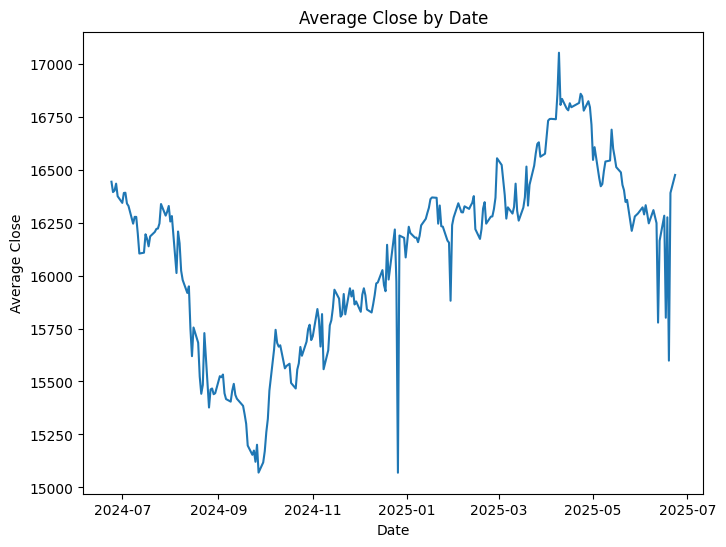

In [ ]:
avg_Close_by_Date = df.groupby('Date')['Close'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_Close_by_Date.index, avg_Close_by_Date.values)
plt.title('Average Close by Date')
plt.xlabel('Date')
plt.ylabel('Average Close')
plt.show()

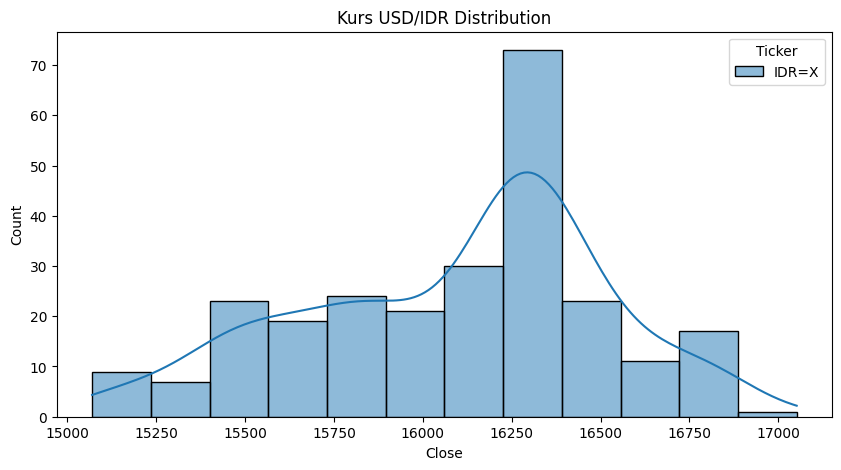

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Close'], kde=True)
plt.title('Kurs USD/IDR Distribution')
plt.xlabel('Close')
plt.show()

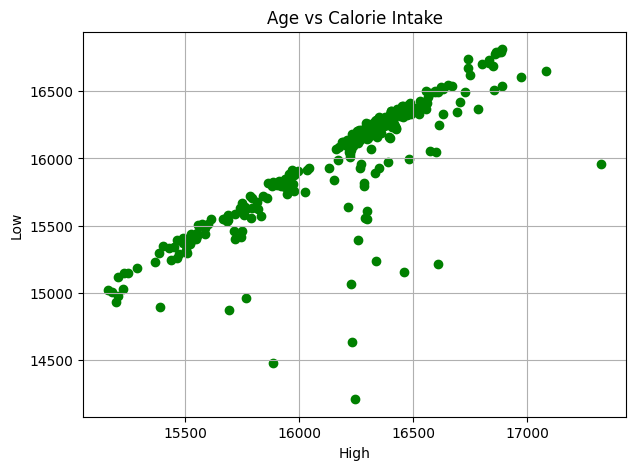

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(x='High', y='Low', data=df, color='green')
plt.title('Age vs Calorie Intake')
plt.xlabel('High')
plt.ylabel('Low')
plt.grid(True)
plt.show()

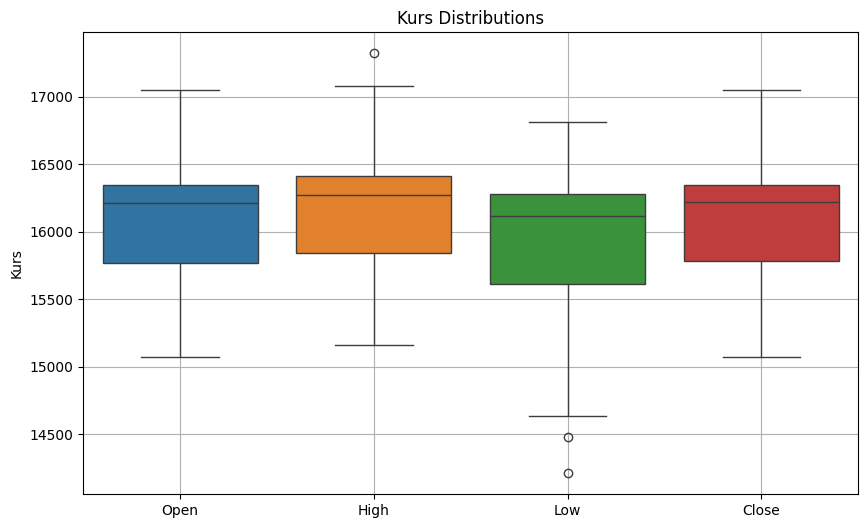

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Kurs Distributions')
plt.ylabel('Kurs')
plt.grid(True)
plt.show()


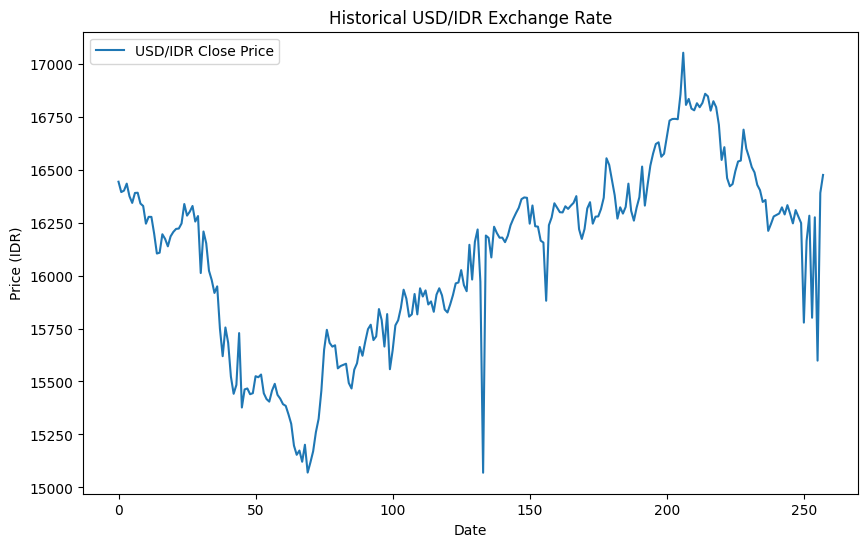

In [ ]:
# Plot harga penutupan
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='USD/IDR Close Price')
plt.title('Historical USD/IDR Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Price (IDR)')
plt.legend()
plt.show()

In [ ]:
# mengeset index (Date)
df = df.set_index('Date')

In [ ]:
df.columns

MultiIndex([( 'Close', 'IDR=X'),
            (  'High', 'IDR=X'),
            (   'Low', 'IDR=X'),
            (  'Open', 'IDR=X'),
            ('Volume', 'IDR=X')],
           names=['Price', 'Ticker'])

# Data Preparation

In [ ]:
scaler = MinMaxScaler()
y = df['Close'].values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)


In [ ]:
n_lookback = 60
n_forecast = 180

X, Y = [], []

for i in range(n_lookback, len(y_scaled) - n_forecast + 1):
    X.append(y_scaled[i - n_lookback: i])
    Y.append(y_scaled[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)


# Modeling

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(n_lookback, 1), unroll=True))
model.add(LSTM(50, unroll=True))
model.add(Dense(n_forecast))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 180)            │         9,180 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,780 (155.39 KB)

 Trainable params: 39,780 (155.39 KB)

 Non-trainable params: 0 (0.00 B)

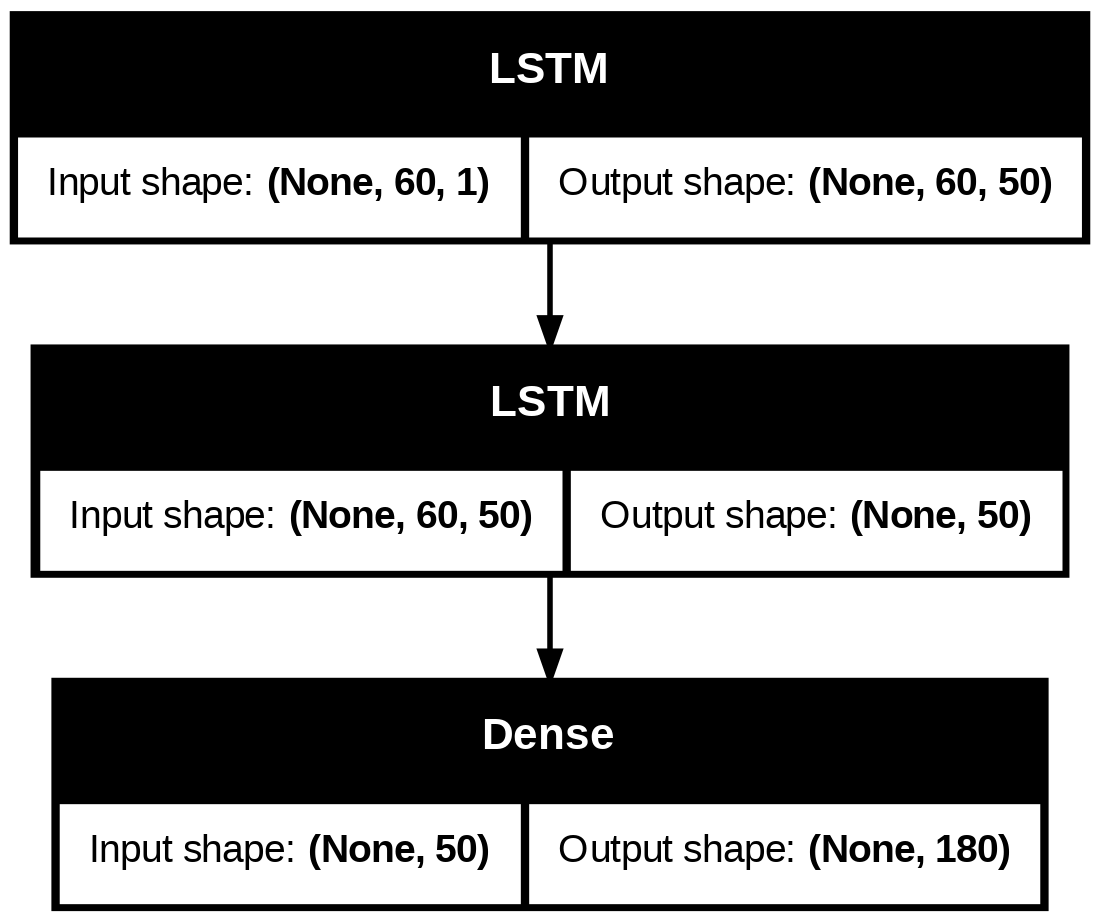

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X, Y, epochs=100, batch_size=16, validation_split=0.1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0051 - val_loss: 0.0085
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0052 - val_loss: 0.0085
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0052 - val_loss: 0.0084
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0054 - val_loss: 0.0082
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0055 - val_loss: 0.0081
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0054 - val_loss: 0.0081
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0053 - val_loss: 0.0084
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0053 - val_loss: 0.0088
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0052 - val_loss: 0.0093
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0051 - val_loss: 0.0094
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0052 - val_loss: 0.0093
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0052 - val_lo

In [ ]:
X_ = y[- n_lookback:] # urutan inputan terakhir
X_ = X_.reshape(1, n_lookback, 1)
Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


DataFrame index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


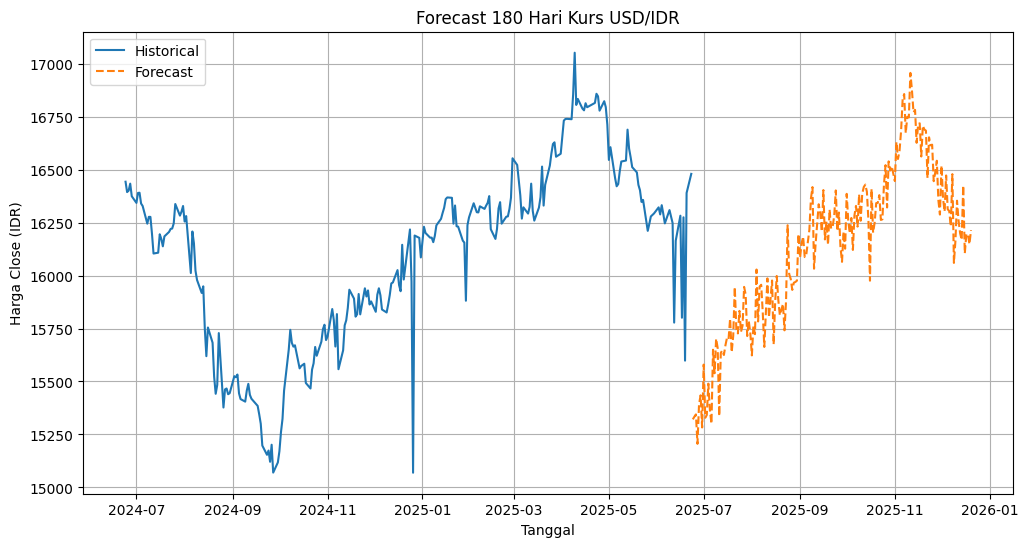

In [ ]:
# mengeset index (Date)
# df = df.set_index('Date') # Remove this redundant line

# Verify the index type before proceeding
print(f"DataFrame index type: {type(df.index)}")

forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=n_forecast)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical')
plt.plot(forecast_dates, Y_, label='Forecast', linestyle='--')
plt.legend()
plt.title("Forecast 180 Hari Kurs USD/IDR")
plt.xlabel("Tanggal")
plt.ylabel("Harga Close (IDR)")
plt.grid(True)
plt.show()

# Evaluation

In [ ]:
# Prediksi
y_pred = model.predict(X)
y_pred_flat = y_pred.reshape(-1, 1)
y_pred_actual = scaler.inverse_transform(y_pred_flat)

# Target asli
Y_reshaped = Y.reshape(-1, 1)
y_actual = scaler.inverse_transform(Y_reshaped)

# RMSE
rmse = np.sqrt(np.mean((y_pred_actual - y_actual) ** 2))
print(f'RMSE: {rmse:.2f}')

# MAPE
mape = np.mean(np.abs((y_actual - y_pred_actual) / (y_actual + 1e-8))) * 100
print(f'Akurasi: {100 - mape:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
RMSE: 148.54
Akurasi: 99.37%


# Deployment

## Model Simulation

## Save Model

In [ ]:
joblib.dump(scaler, 'scaler.pkl')
model.save("kurs.h5")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("kurs.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
converter._experimental_lower_tensor_list_ops = False

tflite_model = converter.convert()
with open("idr.tflite", "wb") as f:
    f.write(tflite_model)

print("🎉 Model berhasil dikonversi dan disimpan sebagai 'idr.tflite'")


Saved artifact at '/tmp/tmp636vht_q'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 60, 1), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 180), dtype=tf.float32, name=None)
Captures:
  133505164155728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133505164160720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133505164163984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133503089060048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133503089056400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133503089055056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133503089058896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133503089056592: TensorSpec(shape=(), dtype=tf.resource, name=None)
🎉 Model berhasil dikonversi dan disimpan sebagai 'idr.tflite'


Convert Hasil Prediksi ke csv

In [ ]:
input_data = y_scaled[-60:].reshape(1, 60, 1).astype(np.float32)


In [ ]:
interpreter = tf.lite.Interpreter(model_path="idr.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
predictions = []

current_input = input_data.copy()

for i in range(180):
    # Set input ke model
    interpreter.set_tensor(input_details[0]['index'], current_input)
    interpreter.invoke()

    # Ambil hasil output
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predictions.append(output_data[0][0])  # ambil angka float-nya

    # Tambahkan output ke urutan input (geser window 60 hari)
    current_input = np.append(current_input[:, 1:, :], [[[output_data[0][0]]]], axis=1)


In [ ]:
# Unscale hasil prediksi ke nilai asli
pred_array = np.array(predictions).reshape(-1, 1)
pred_unscaled = scaler.inverse_transform(pred_array)

# Simpan ke CSV
df_pred = pd.DataFrame(pred_unscaled, columns=["predicted"])
df_pred["day"] = df_pred.index + 1
df_pred.to_csv("prediksi_kurs.csv", index=False)

In [ ]:
import numpy as np
import tensorflow as tf

# 1. Upload file TFLite ke notebook (untuk Google Colab)
from google.colab import files
uploaded = files.upload()

# Atau jika file sudah ada di direktori
# model_path = 'model.tflite'

# 2. Ambil nama file yang diupload
model_path = list(uploaded.keys())[0]

# 3. Load interpreter TFLite
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# 4. Dapatkan input dan output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 5. Cetak informasi model
print("== Input Details ==")
print(input_details)
print("\n== Output Details ==")
print(output_details)

# 6. Contoh untuk melihat shape input
input_shape = input_details[0]['shape']
print(f"\nInput shape: {input_shape}")

Saving idr.tflite to idr.tflite
== Input Details ==
[{'name': 'serving_default_input_layer_2:0', 'index': 0, 'shape': array([ 1, 60,  1], dtype=int32), 'shape_signature': array([-1, 60,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

== Output Details ==
[{'name': 'StatefulPartitionedCall_1:0', 'index': 2186, 'shape': array([  1, 180], dtype=int32), 'shape_signature': array([ -1, 180], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

Input shape: [ 1 60  1]
